In [13]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

train = pd.read_csv('Uniqlo.csv')
test = pd.read_csv('Uniqlo-test.csv')

In [14]:
train = train.rename(columns={'Stock Trading': 'Trading Value'})
train = train.iloc[::-1].reset_index(drop=True)
train.dropna(inplace = True)

test = test.rename(columns={'Stock Trading': 'Trading Value'})
test = test.iloc[::-1].reset_index(drop=True)
test.dropna(inplace = True)

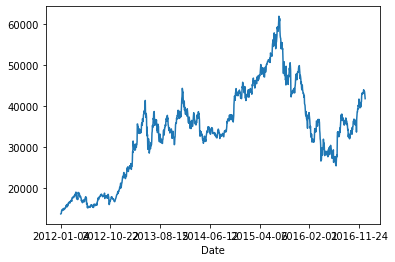

In [15]:
train.set_index('Date', inplace=True)
train[['Close', 'Volume']].plot(subplots=True, figsize=(10,10))
plt.show()

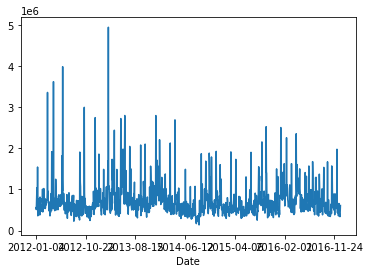

In [22]:
# 50 period moving average of closing price

In [16]:
X = train[['Open', 'High', 'Low', 'Volume', 'Trading Value']]
y = train[['Close']]

X_test = test[['Open', 'High', 'Low', 'Volume', 'Trading Value']]
y_test = test[['Close']]

In [23]:
model = RandomForestClassifier()

grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X, y)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


c:\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [5]:
clf = RandomForestClassifier()
clf.fit(X,y)

C:\Users\Brian\AppData\Local\Temp/ipykernel_16992/1974482336.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X,y)


RandomForestClassifier()

In [7]:
pred = clf.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, pred)
mse

277389.28571428574

In [9]:
mae = mean_absolute_error(y_test, pred)
mae

422.14285714285717

In [10]:
regr = RandomForestRegressor()
regr.fit(X, y)
pred = regr.predict(X_test)

C:\Users\Brian\AppData\Local\Temp/ipykernel_16992/1395229835.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


In [11]:
mse = mean_squared_error(y_test, pred)
mse

132546.15642857042